# Copyright

<PRE>
This notebook was created as part of the "Deep learning / VITMMA19" class at
Budapest University of Technology and Economics, Hungary,
https://portal.vik.bme.hu/kepzes/targyak/VITMMA19

Any re-use or publication of any part of the notebook is only allowed with the
 written consent of the authors.

2023 (c) Tamás Gábor Csapó, Bálint Gyires-Tóth (toth.b kukac tmit pont bme pont hu)
</PRE>

# Regression with deep learning

In this notebook we will see a "Hello World" of machine learning, using the Californa Housing Prices dataset. 

Database:
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

More details and analysis: 
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Next step: import required modules and set random seed

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import copy
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler


np.random.seed(123)

Load data, split to train-validation-test set, and do standardization on the input:

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [3]:
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
dataset = california_housing.frame.values
test_split = 0.1
valid_split = 0.1

X = dataset[:,0:-1]
Y = dataset[:,-1]

v_index = int(X.shape[0]*(1-valid_split-test_split))
t_index = int(X.shape[0]*(1-test_split))

X_test = X[t_index:]
Y_test = Y[t_index:]
X_valid = X[v_index:t_index]
Y_valid = Y[v_index:t_index]
X = X[:v_index]
Y = Y[:v_index]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


add callback functions:

In [5]:
patience = 40
early_stopping = EarlyStopping(patience=patience, verbose=1)
checkpointer = ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

create the network and train:

In [6]:
model = Sequential()
model.add(Dense(units=200, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))

sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=sgd)
history=model.fit(X,Y,epochs=10000, 
                  batch_size=16,
                  verbose=2,
                  validation_data=(X_valid, Y_valid),
                  callbacks=[checkpointer, early_stopping])

Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



Epoch 1: val_loss improved from inf to 0.79009, saving model to weights.hdf5
1032/1032 - 6s - loss: 1.0758 - val_loss: 0.7901 - 6s/epoch - 6ms/step
Epoch 2/10000

Epoch 2: val_loss did not improve from 0.79009
1032/1032 - 3s - loss: 0.8728 - val_loss: 1.0118 - 3s/epoch - 3ms/step
Epoch 3/10000

Epoch 3: val_loss did not improve from 0.79009
1032/1032 - 3s - loss: 0.8142 - val_loss: 0.8224 - 3s/epoch - 3ms/step
Epoch 4/10000

Epoch 4: val_loss did not improve from 0.79009
1032/1032 - 3s - loss: 0.7692 - val_loss: 0.9121 - 3s/epoch - 3ms/step
Epoch 5/10000

Epoch 5: val_loss did not improve from 0.79009
1032/1032 - 3s - loss: 0.7526 - val_loss: 0.9344 - 3s/epoch - 2ms/step
Epoch 6/10000

Epoch 6: val_loss did not improve from 0.79009
1032/1032 - 2s - loss: 0.7368 - val_loss: 1.0772 - 2s/epoch - 2ms/step
Epoch 7/10000

Epoch 7: val_loss did not improve from 0.79009
1032/1032 - 2s - loss: 0.7127 - val_loss: 0.7994 - 2s/epoch - 2ms/step
Epoch 8/10000

Epoch 8: val_loss did not improve from

After training is finished, we load back the best model, and evaluate this on the test data. What can this value mean?

In [7]:
model = load_model('weights.hdf5')

from sklearn.metrics import mean_squared_error
import math

preds = model.predict(X_test)
test_err = mean_squared_error(Y_test,preds)
print("\nTest error: %f" % (test_err))
print(f"It means that the model results in average sqrt({test_err:0.3f}))={math.sqrt(test_err):0.3f} error on the test set.")
print(f"It means that the model in average is wrong with {math.sqrt(test_err)*100000:0.0f}$.")


Teszt hiba: 0.326710
Ez az jelenti, hogy sqrt(0.327))=0.572-at hibáz átlagosan a modell a teszt adatokon.
Ez annyit jelent, hogy átlagosan 57159$-t téved a modellünk.


Let's check the results graphically:

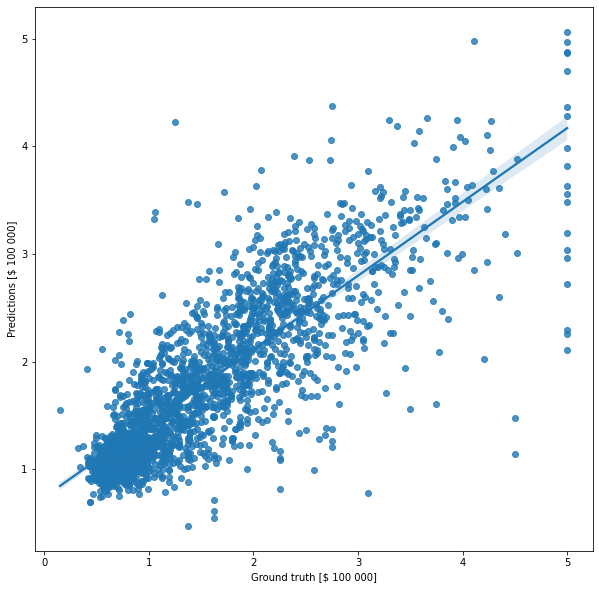

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
fig = sns.regplot(x=Y_test, y=preds.reshape(-1));
# fig.set(xlim=(10,30),ylim=(10,30))
plt.xlabel("Ground truth [$ 100 000]")
plt.ylabel("Predictions [$ 100 000]")
plt.show()

What does the figure mean? What would a horizontal line mean? And a vertical line?